# Table of Contents
* [The HiC_data object](#The-HiC_data-object)
* [Filter columns with too few interaction count](#Filter-columns-with-too-few-interaction-count)
* [Normalization](#Normalization)
	* [Other normalizations](#Other-normalizations)
* [Save raw and normalized matrices](#Save-raw-and-normalized-matrices)
	* [Save biases and bin filtering](#Save-biases-and-bin-filtering)
	* [Save normalized chromosome matrices](#Save-normalized-chromosome-matrices)


# The HiC_data object

In [16]:
from pytadbit.parsers.hic_parser import load_hic_data_from_reads

In [17]:
r_enz = 'HindIII'
reso = 100000

In [ ]:
hic_data = load_hic_data_from_reads(
    'results/fragment/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz),
    reso)

# Filter columns with too few interaction count

For this, very sparse, example dataset we are going to ask for very few interactions per bin.

This can be done either by setting `min_perc` asking for each bin to contain a minimum percentage of cells with interaction data. Or but setting `min_count` asking that the number of cells with interaction data of each bin is above the defined cutoff.


     2     4     5  1203  1208  1218  1220  1222  1224  1225  1226  1227  1228  1229  1230  1231  1232  1233  1234  1235
  1236  1237  1238  1239  1240  1241  1242  1243  1244  1245  1246  1247  1248  1253  1254  1255  1256  1257  1258  1259
  1260  1261  1262  1263  1264  1265  1266  1267  1268  1269  1270  1271  1272  1273  1274  1275  1276  1277  1278  1279
  1280  1281  1282  1283  1284  1285  1286  1287  1288  1289  1290  1291  1292  1293  1294  1295  1296  1297  1298  1299
  1300  1301  1302  1303  1304  1305  1306  1307  1308  1309  1310  1311  1312  1313  1314  1315  1316  1317  1318  1319
  1320  1321  1322  1323  1324  1325  1326  1327  1328  1329  1330  1331  1332  1333  1334  1335  1336  1337  1338  1339
  1340  1341  1342  1343  1344  1345  1346  1347  1348  1349  1350  1351  1352  1353  1354  1355  1356  1357  1358  1359
  1360  1361  1362  1363  1364  1365  1366  1367  1368  1369  1370  1371  1372  1373  1374  1375  1376  1377  1378  1379
  1380  1381  1382  1383  1384 

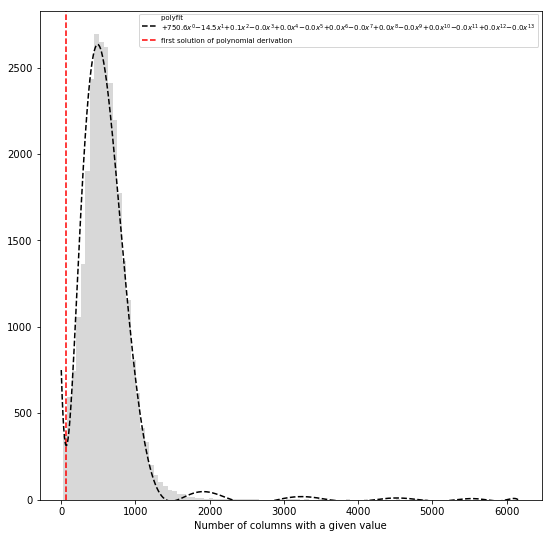

In [ ]:
hic_data.filter_columns(draw_hist=True, min_count=10, by_mean=True)

In [ ]:
print len(hic_data)
print len(hic_data.bads)

## Save the sum of bins for Quique

In [ ]:
bins = []
for i in range(len(hic_data)):
    bins.append(sum(hic_data[i, j] for j in range(len(hic_data))))

out = open('results/fragment/{1}/04_normalizing/biases_{0}_{1}.tsv'.format(reso, r_enz), 'w')
for val in bins:
    out.write(str(val) + '\n')
out.close()

# Normalization

As normalization we use either the ICE normalization <a name="ref-1"/>[(Imakaev et al., 2012)](#cite-Imakaev2012a) with a "full" normalization until the sum of all columns of the matrix are equal, or something more similar to the _vanilla_ normalization used in <a name="ref-2"/>[(Rao et al., 2014)](#cite-Rao2014) which is exactly like running the ICE normalization without iterations.

_Note: if columns with a lot of zeroes are present the ICE normalization will last very long to converge, and these low-coverage columns will present, at the end of the normalization, few cells with very high values of interaction_

In [ ]:
hic_data.normalize_hic(iterations=10, max_dev=0.1)

At 100 kb itmakes no sense to view the full matrix (your matrix will have more cells than your screen have pixels).

Try plotting a region of the genome only, with the `focus` parameter.

In [ ]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data, normalized=True, focus='chr18', show=True)

## Other normalizations

ICE normalization is widely used however other, more convaluted, normalizations <a name="ref-1"/>[(Hu et al., 2012)](#cite-hu2012hicnorm) <a name="ref-2"/>[(Yaffe and Tanay, 2011)](#cite-Yaffe2011) can be used outside TADbit and then added as normalized matrices.

# Save raw and normalized matrices

## Save biases and bin filtering

In [ ]:
from cPickle import dump

In [ ]:
! mkdir -p results/fragment/$r_enz/04_normalizing

Save biases to separate file.

In [ ]:
out = open('results/fragment/{1}/04_normalizing/biases_{0}_{1}.pick'.format(reso, r_enz), 'w')
dump(hic_data.bias, out)
out.close()

Save "bad" columns to an other file

In [ ]:
out = open('results/fragment/{1}/04_normalizing/bad_columns_{0}_{1}.pick'.format(reso, r_enz), 'w')
dump(hic_data.bads, out)
out.close()

## Save normalized chromosome/genome matrices

This time we do not need to save appart the normalization biases and the list of columns with poor signal.

In [ ]:
hic_map(hic_data, by_chrom='intra', normalized=False,
       savedata='results/fragment/{1}/04_normalizing/{0}_raw'.format(reso, r_enz))

In [ ]:
hic_map(hic_data, by_chrom='intra', normalized=True,
       savedata='results/fragment/{1}/04_normalizing/{0}_norm'.format(reso, r_enz))

If the resolution is not to low, we could also save genomic matrices:

In [ ]:
if reso >= 300000:
    hic_map(hic_data, by_chrom=False, normalized=False,
            savedata='results/fragment/{1}/04_normalizing/{0}_raw.mat'.format(reso, r_enz))

    hic_map(hic_data, by_chrom=False, normalized=True,
            savedata='results/fragment/{1}/04_normalizing/{0}_norm.mat'.format(reso, r_enz))

<!--bibtex
@article{hu2012hicnorm,
  title={HiCNorm: removing biases in Hi-C data via Poisson regression},
  author={Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S},
  journal={Bioinformatics},
  volume={28},
  number={23},
  pages={3131--3133},
  year={2012},
  publisher={Oxford Univ Press}
}
@article{Yaffe2011,
abstract = {Hi-C experiments measure the probability of physical proximity between pairs of chromosomal loci on a genomic scale. We report on several systematic biases that substantially affect the Hi-C experimental procedure, including the distance between restriction sites, the GC content of trimmed ligation junctions and sequence uniqueness. To address these biases, we introduce an integrated probabilistic background model and develop algorithms to estimate its parameters and renormalize Hi-C data. Analysis of corrected human lymphoblast contact maps provides genome-wide evidence for interchromosomal aggregation of active chromatin marks, including DNase-hypersensitive sites and transcriptionally active foci. We observe extensive long-range (up to 400 kb) cis interactions at active promoters and derive asymmetric contact profiles next to transcription start sites and CTCF binding sites. Clusters of interacting chromosomal domains suggest physical separation of centromere-proximal and centromere-distal regions. These results provide a computational basis for the inference of chromosomal architectures from Hi-C experiments.},
author = {Yaffe, Eitan and Tanay, Amos},
doi = {10.1038/ng.947},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Yaffe, Tanay - 2011 - Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal archit.pdf:pdf},
issn = {1546-1718},
journal = {Nature genetics},
keywords = {Binding Sites,Chromosomes,Cluster Analysis,Epigenesis,Genetic,Human,Humans,Lymphocytes,Lymphocytes: ultrastructure,Models,Probability},
mendeley-groups = {Research articles},
month = {nov},
number = {11},
pages = {1059--65},
pmid = {22001755},
title = {{Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22001755},
volume = {43},
year = {2011}
}
@article{Imakaev2012a,
abstract = {Extracting biologically meaningful information from chromosomal interactions obtained with genome-wide chromosome conformation capture (3C) analyses requires the elimination of systematic biases. We present a computational pipeline that integrates a strategy to map sequencing reads with a data-driven method for iterative correction of biases, yielding genome-wide maps of relative contact probabilities. We validate this ICE (iterative correction and eigenvector decomposition) technique on published data obtained by the high-throughput 3C method Hi-C, and we demonstrate that eigenvector decomposition of the obtained maps provides insights into local chromatin states, global patterns of chromosomal interactions, and the conserved organization of human and mouse chromosomes.},
author = {Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A},
doi = {10.1038/nmeth.2148},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Imakaev et al. - 2012 - Iterative correction of Hi-C data reveals hallmarks of chromosome organization.pdf:pdf},
issn = {1548-7105},
journal = {Nature methods},
keywords = {Hi-C},
mendeley-groups = {stats/Hi-C,Research articles},
mendeley-tags = {Hi-C},
month = {oct},
number = {10},
pages = {999--1003},
pmid = {22941365},
title = {{Iterative correction of Hi-C data reveals hallmarks of chromosome organization.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22941365},
volume = {9},
year = {2012}
}
@article{Rao2014,
author = {Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and {James T. Robinson} and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez},
doi = {10.1016/j.cell.2014.11.021},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Rao et al. - 2014 - A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping.pdf:pdf},
issn = {0092-8674},
journal = {Cell},
keywords = {Hi-C},
mendeley-groups = {Research articles,projects/GEVO/CTCF},
mendeley-tags = {Hi-C},
number = {7},
pages = {1665--1680},
pmid = {25497547},
publisher = {Elsevier Inc.},
title = {{A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping}},
url = {http://dx.doi.org/10.1016/j.cell.2014.11.021},
volume = {159},
year = {2014}
}

-->

# References

<a name="cite-Imakaev2012a"/><sup>[^](#ref-1) </sup>Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A. 2012. _Iterative correction of Hi-C data reveals hallmarks of chromosome organization._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22941365)

<a name="cite-Rao2014"/><sup>[^](#ref-2) </sup>Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and James T. Robinson and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez. 2014. _A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping_. [URL](http://dx.doi.org/10.1016/j.cell.2014.11.021)

<a name="cite-hu2012hicnorm"/><sup>[^](#ref-3) </sup>Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S. 2012. _HiCNorm: removing biases in Hi-C data via Poisson regression_.

<a name="cite-Yaffe2011"/><sup>[^](#ref-4) </sup>Yaffe, Eitan and Tanay, Amos. 2011. _Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22001755)

